<a href="https://colab.research.google.com/github/acg12/ml_projects/blob/main/KNN/ML_KNN_CLASSIFICATION_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN from scratch

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, r2_score
from sklearn.datasets import load_iris

In [ ]:
df = load_iris()
df.data.shape

(150, 4)

In [ ]:
X = df.data
y = df.target

In [ ]:
counts = np.unique(y, return_counts=True)

for i in range(len(np.unique(y))):
    c = np.unique(y, return_counts=True)
    print(f'Class {c[0][i]}: {c[1][i]}')

Class 0: 50
Class 1: 50
Class 2: 50


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
X_test.shape

(30, 4)

In [ ]:
def euclidean(p1, p2):
  return np.sqrt(np.sum((p1 - p2)**2))

def knn_predict(X_train, y_train, X_test, k):
  pred = []

  for x in X_test:
    dist = []

    for train in X_train:
      dist.append(euclidean(x, train))

    dist = np.array(dist)
    top_k = np.argsort(dist)[:k]

    labels = y_train[top_k]
    pred.append(mode(labels).mode[0])

  return pred

#1. Tune KNN for optimal K

In [ ]:
error = []
for k in range(1, 50):
  y_pred = knn_predict(X_train, y_train, X_test, k)
  error.append(np.sqrt(mean_squared_error(y_test, y_pred))) # RMSE

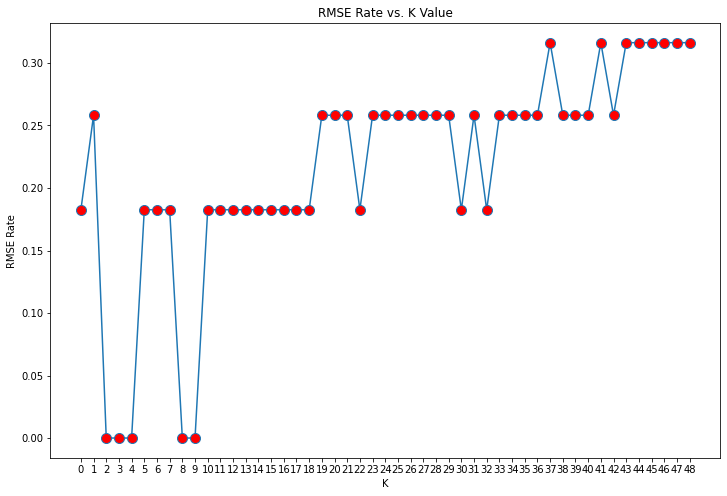

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(error, marker='o', markerfacecolor='red', markersize=10)
plt.title('RMSE Rate vs. K Value')
plt.xticks(np.arange(0, len(error), 1.0))
plt.xlabel('K')
plt.ylabel('RMSE Rate')
plt.show()

Dari graf di atas kita bisa melihat bahwa nilai k optimum adalah **9**.

In [ ]:
optimum_k = 9

y_pred = knn_predict(X_train, y_train, X_test, optimum_k)
acc = accuracy_score(y_test, np.array(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Accuracy score: {acc}')
print(f'RMSE: {rmse}')

Accuracy score: 1.0
RMSE: 0.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



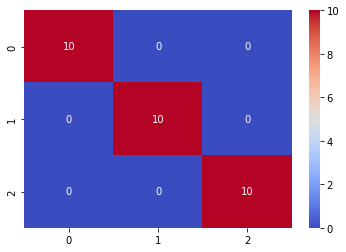

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.show()

#2. Test KNN with different distance measures

## Manhattan Distance

In [ ]:
def manhattan(p1, p2):
  return sum(abs(v1 - v2) for v1, v2 in zip(p1, p2))

def knn_manhattan(X_train, y_train, X_test, k):
  pred = []

  for x in X_test:
    dist = []

    for train in X_train:
      dist.append(manhattan(x, train))

    dist = np.array(dist)
    top_k = np.argsort(dist)[:k]

    labels = y_train[top_k]
    pred.append(mode(labels).mode[0])

  return pred

In [ ]:
y_pred_man = knn_manhattan(X_train, y_train, X_test, optimum_k)

acc = accuracy_score(y_test, y_pred_man)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_man))
print(f'Accuracy score: {acc}')
print(f'RMSE: {rmse}')

Accuracy score: 0.9333333333333333
RMSE: 0.2581988897471611


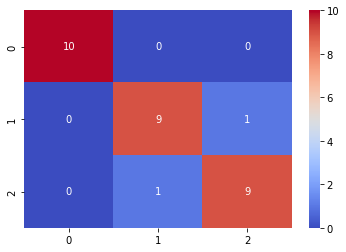

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_man), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_man))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Hamming Distance

In [ ]:
def hamming(p1, p2):
  return sum(v1 != v2 for v1, v2 in zip(p1, p2))

def knn_hamming(X_train, y_train, X_test, k):
  pred = []

  for x in X_test:
    dist = []

    for train in X_train:
      dist.append(hamming(x, train))

    dist = np.array(dist)
    top_k = np.argsort(dist)[:k]

    labels = y_train[top_k]
    pred.append(mode(labels).mode[0])

  return pred

In [ ]:
y_pred_hamm = knn_hamming(X_train, y_train, X_test, optimum_k)

acc = accuracy_score(y_test, y_pred_hamm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_hamm))
print(f'Accuracy score: {acc}')
print(f'RMSE: {rmse}')

Accuracy score: 0.8
RMSE: 0.5477225575051661


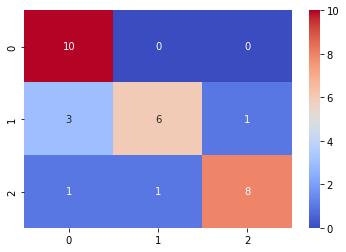

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_hamm), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_hamm))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.86      0.60      0.71        10
           2       0.89      0.80      0.84        10

    accuracy                           0.80        30
   macro avg       0.82      0.80      0.79        30
weighted avg       0.82      0.80      0.79        30



## Minkowski Distance

In [ ]:
def p_root(value, root):
  root_value = 1 / float(root)
  return round(value ** root_value, 3)

def minkowski(p1, p2, p):
  return (p_root(sum(pow(abs(a - b), p) for a, b in zip(p1, p2)), p))

def knn_minkowski(X_train, y_train, X_test, k, p):
  pred = []

  for x in X_test:
    dist = []

    for train in X_train:
      dist.append(minkowski(x, train, p))

    dist = np.array(dist)
    top_k = np.argsort(dist)[:k]

    labels = y_train[top_k]
    pred.append(mode(labels).mode[0])

  return pred

In [ ]:
y_pred_min = knn_minkowski(X_train, y_train, X_test, optimum_k, 3)

acc = accuracy_score(y_test, y_pred_min)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_min))
print(f'Accuracy score: {acc}')
print(f'RMSE: {rmse}')

Accuracy score: 1.0
RMSE: 0.0


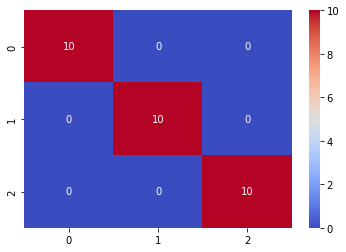

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_min), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_min))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#3. Regression

Untuk regression, saya akan implementasi menghitung distance menggunakan *euclidean distance*.

In [58]:
def euclidean(p1, p2):
  return np.sqrt(np.sum((p1 - p2)**2))

def knn_regression(X_train, y_train, X_test, k):
  pred = []

  for x in X_test:
    dist = []

    for train in X_train:
      dist.append(euclidean(x, train))

    dist = np.array(dist)
    top_k = np.argsort(dist)[:k]

    y_values = y_train[top_k]
    pred.append(np.mean(y_values))

  return pred

Dataset yang saya pakai adalah dataset yang disediakan oleh library sklearn, yaitu dataset California Housing. Isinya adalah data tentang harga rumah di California. Dataset dapat ditemukan disini: [California Housing Dataset (sklearn)](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

Target saya adalah memprediksi harga rumah di California.

## Import data

In [1]:
!wget 'https://raw.githubusercontent.com/acg12/ml_projects/main/KNN/CarPrice.csv'

--2022-05-21 09:31:22--  https://raw.githubusercontent.com/acg12/ml_projects/main/KNN/CarPrice.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26717 (26K) [text/plain]
Saving to: ‘CarPrice.csv’

CarPrice.csv        100%[===================>]  26.09K  --.-KB/s    in 0.002s  

2022-05-21 09:31:22 (13.2 MB/s) - ‘CarPrice.csv’ saved [26717/26717]



In [3]:
# df = pd.read_csv('Life Expectancy Data.csv')
df = pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Preprocessing

In [12]:
# Ambil nama kolom yang bertipe object/string
str_cols = df.select_dtypes(include=['object']).columns
print(str_cols)
print(len(str_cols))

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
10


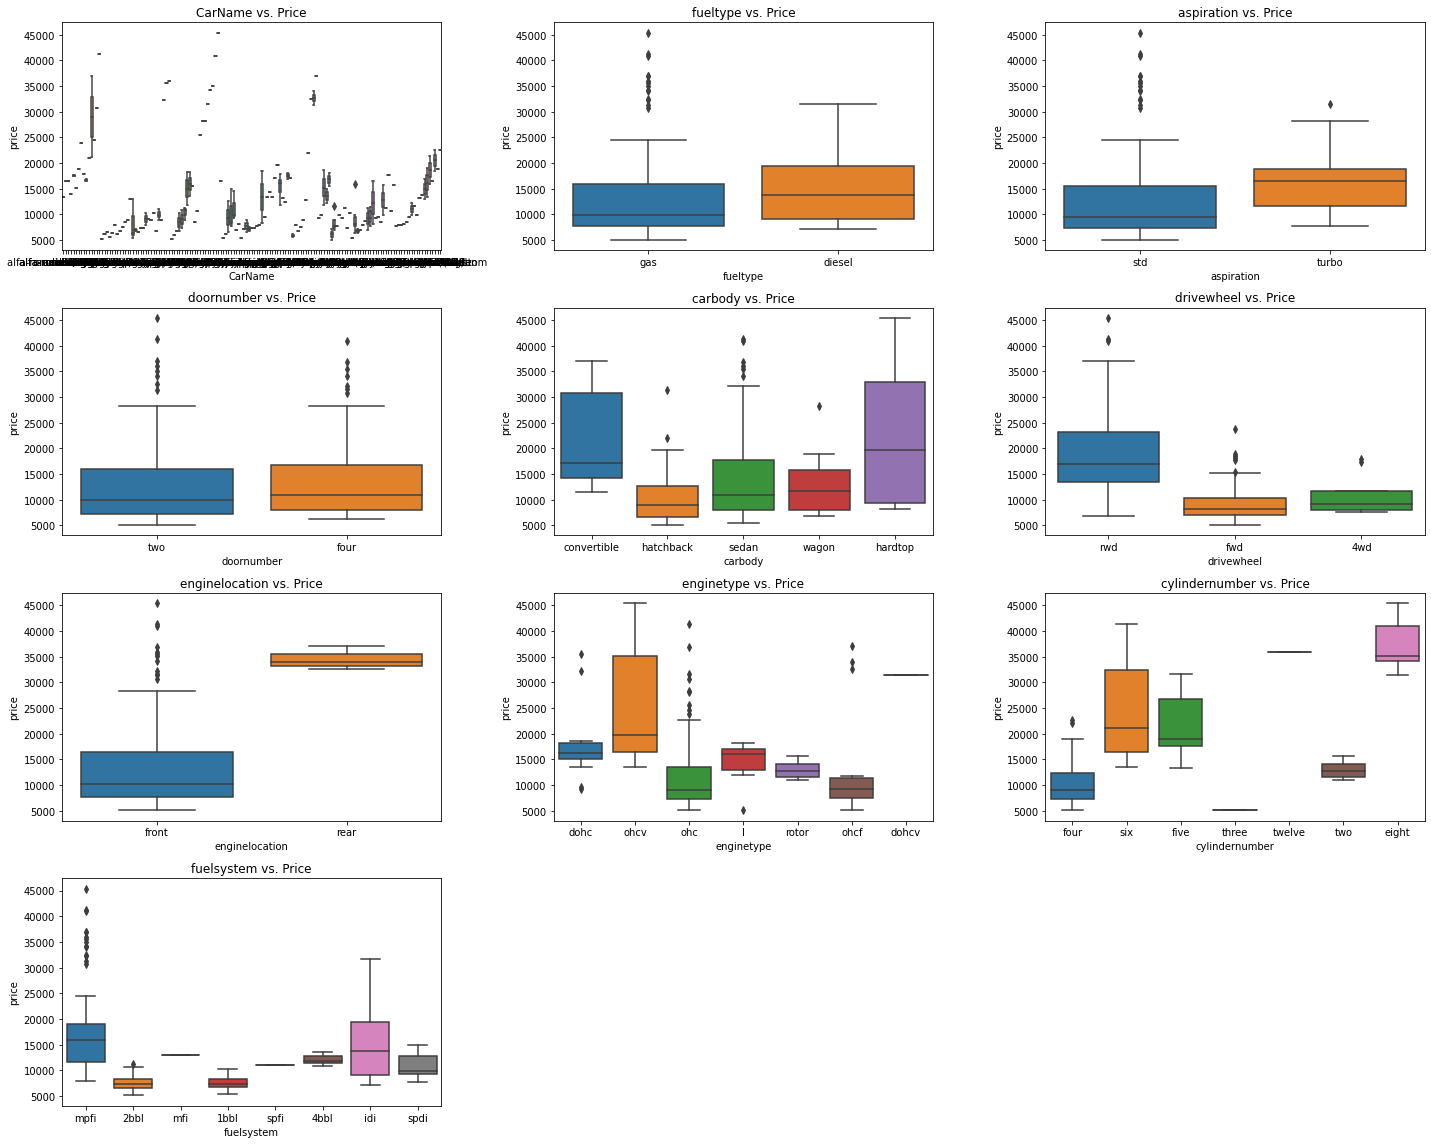

In [26]:
fig = plt.figure(figsize=(20, 16))

for i, col in zip(range(1, len(str_cols) + 1), str_cols):
  ax = fig.add_subplot(4, 3, i)
  g = sns.boxplot(x=col, y="price", data=df, ax=ax)
  plt.title(col + ' vs. Price')
plt.tight_layout()

Dari graf di atas kita bisa menentukan bahwa variabel seperti 'fueltype', 'aspiration', 'drivewheel', 'enginelocation', dan 'cylindernumber' memiliki potensi untuk memiliki korelasi yang lumayan dengan variabel dependent yaitu 'price'. Sisanya terlalu bervariasi, bisa kita buang.

In [34]:
keep = ['fueltype', 'aspiration', 'drivewheel', 'enginelocation', 'cylindernumber']
del_cols = [x for x in str_cols if x not in keep]
del_cols

['CarName', 'doornumber', 'carbody', 'enginetype', 'fuelsystem']

In [38]:
dropped = df.drop(del_cols, axis=1)
dropped.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Selanjutnya:
- Mengubah 'fueltype' menjadi 0 dan 1: 0 untuk gas, 1 untuk diesel
- Mengubah 'aspiration' menjadi 0 dan 1: 0 untuk std, 1 untuk turbo
- Mengubah 'enginelocation' menjadi 0 dan 1: 0 untuk front, 1 untuk rear

In [39]:
fueltype = pd.Series([0 if x == 'gas' else 1 for x in df.loc[:, 'fueltype']], name='fueltype')
aspiration = pd.Series([0 if x == 'std' else 1 for x in df.loc[:, 'aspiration']], name='aspiration')
enginelocation = pd.Series([0 if x == 'front' else 1 for x in df.loc[:, 'enginelocation']], name='enginelocation')

encoded = pd.concat([dropped.drop(['fueltype', 'aspiration', 'enginelocation'], axis=1), fueltype, aspiration, enginelocation], axis=1)
encoded.head()

,car_ID,symboling,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype,aspiration,enginelocation
0,1,3,rwd,88.6,168.8,64.1,48.8,2548,four,130,...,2.68,9.0,111,5000,21,27,13495.0,0,0,0
1,2,3,rwd,88.6,168.8,64.1,48.8,2548,four,130,...,2.68,9.0,111,5000,21,27,16500.0,0,0,0
2,3,1,rwd,94.5,171.2,65.5,52.4,2823,six,152,...,3.47,9.0,154,5000,19,26,16500.0,0,0,0
3,4,2,fwd,99.8,176.6,66.2,54.3,2337,four,109,...,3.40,10.0,102,5500,24,30,13950.0,0,0,0
4,5,2,4wd,99.4,176.6,66.4,54.3,2824,five,136,...,3.40,8.0,115,5500,18,22,17450.0,0,0,0


Terakhir mengubah 'drivewheel' dan 'wheelnumber' menjadi dummy variabel.

In [41]:
final = pd.get_dummies(encoded)

# Drop satu dari setiap kombinasi dummy agar tidak terjadi korelasi 
# yang tinggi diantara dummy variabel ini

final.drop(['drivewheel_fwd', 'cylindernumber_six'], axis=1, inplace=True)
final.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,aspiration,enginelocation,drivewheel_4wd,drivewheel_rwd,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,0,1,0,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,0,1,0,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,1,0,0,0,0,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,1,0,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,1,0,0,1,0,0,0,0


## Korelasi

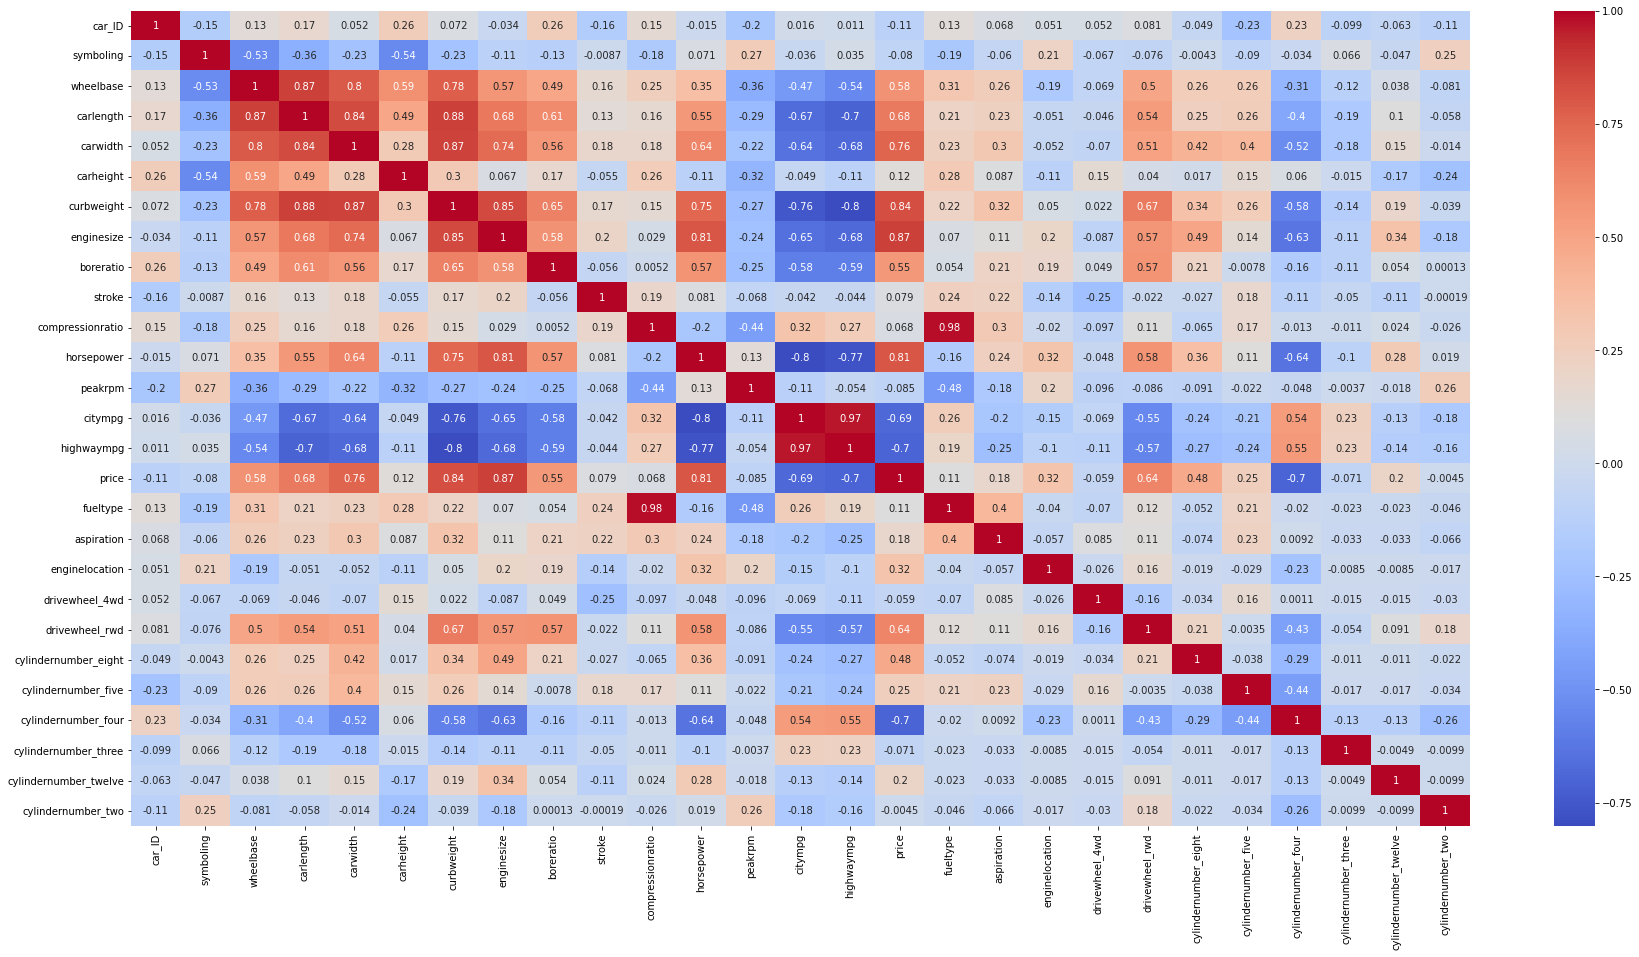

In [43]:
plt.figure(figsize=(30, 15))
sns.heatmap(final.corr(), annot=True, cmap='coolwarm')
plt.show()

Dari correlation matrix ini saya akan mengambil fitur yang memiliki korelasi di atas 0.5 dengan kolom *Price*:
- cylindernumber_four
- drivewheel_rwd
- highwaympg
- citympg
- horsepower
- boreratio
- enginesize
- curbweight
- carwidth
- carlength
- wheelbase

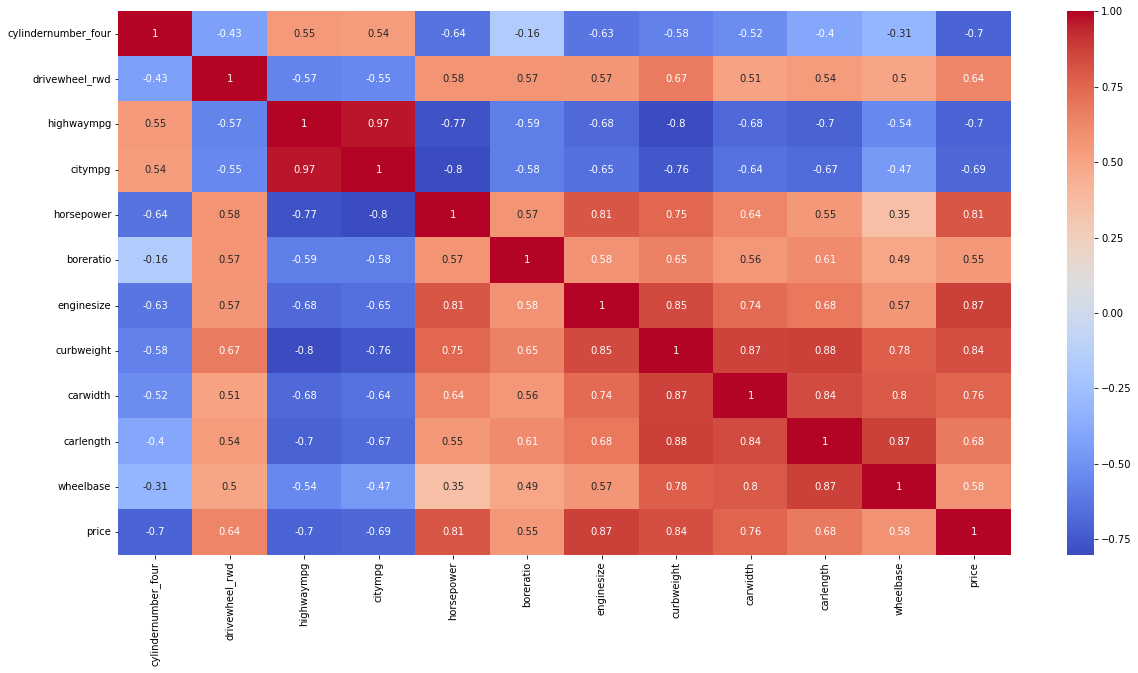

In [46]:
choice = ['cylindernumber_four', 'drivewheel_rwd', 'highwaympg', 'citympg',
          'horsepower', 'boreratio', 'enginesize', 'curbweight', 'carwidth',
          'carlength', 'wheelbase', 'price']

filtered_df = final[choice]

plt.figure(figsize=(20, 10))
sns.heatmap(filtered_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Variabel 'horsepower', 'boreratio', 'enginesize', 'curbweight', 'carwidth', 'carlength', 'wheelbase' memiliki korelasi yang sangat kuat satu sama lainnya. Saya akan menyimpan satu saja, variabel 'enginesize' yang memiliki korelasi sebesar 0.87 dengan 'price'.

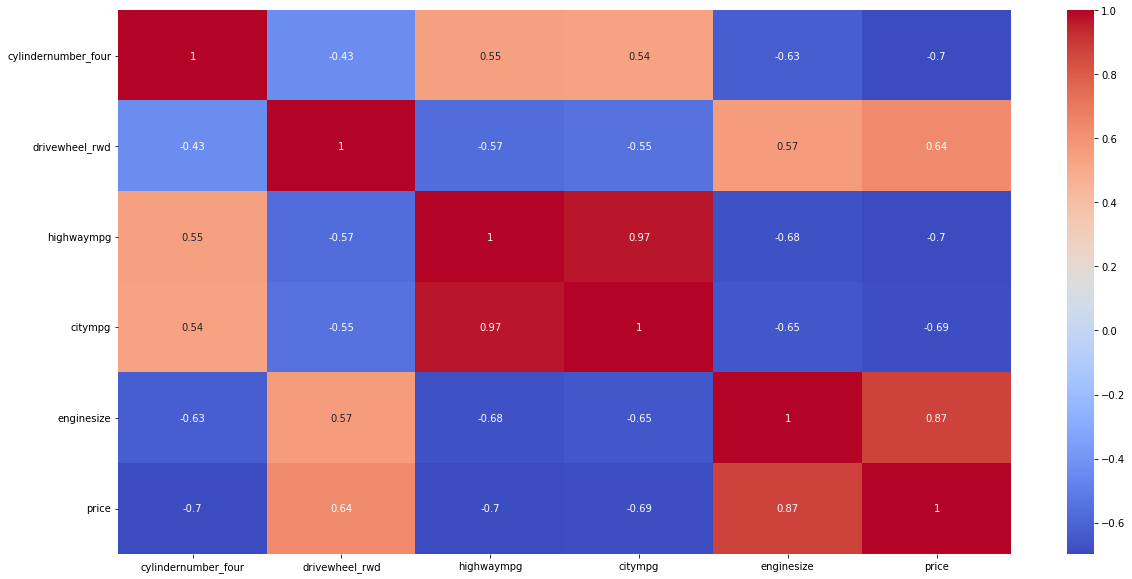

In [48]:
temp = filtered_df.drop(['horsepower', 'boreratio', 'curbweight', 'carwidth', 'carlength', 'wheelbase'], axis=1)

plt.figure(figsize=(20, 10))
sns.heatmap(temp.corr(), annot=True, cmap='coolwarm')
plt.show()

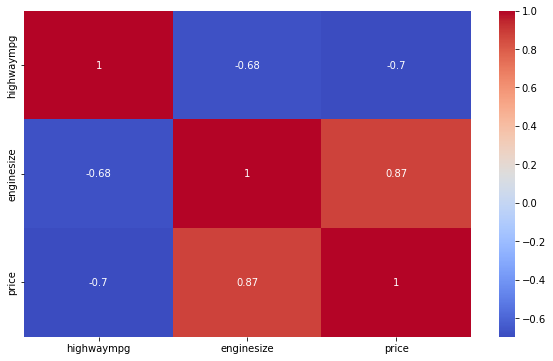

In [52]:
final_df = temp.drop(['cylindernumber_four', 'drivewheel_rwd', 'citympg'], axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [63]:
X = np.array(final_df[['highwaympg', 'enginesize']])
y = np.array(final_df['price'])

## Split dataset

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train.shape

(164, 2)

## Find optimal *k* value

In [86]:
error = []
for k in range(1, 20):
  y_pred = knn_regression(X_train, y_train, X_test, k)
  error.append(np.sqrt(mean_squared_error(y_test, y_pred))) # RMSE

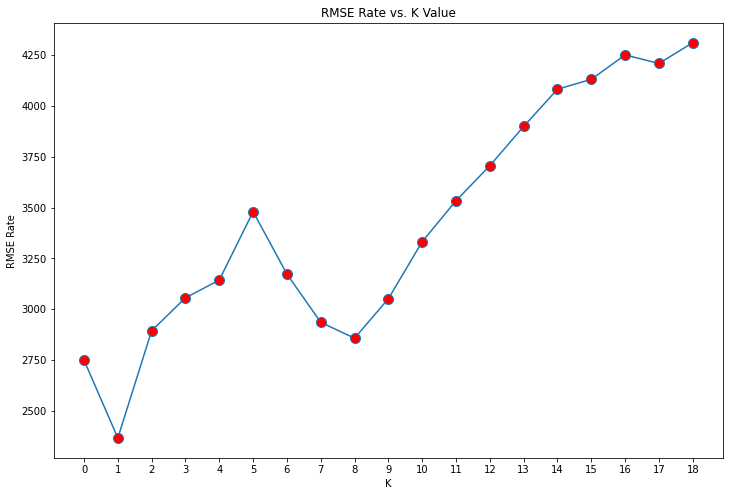

In [87]:
plt.figure(figsize=(12, 8))
plt.plot(error, marker='o', markerfacecolor='red', markersize=10)
plt.title('RMSE Rate vs. K Value')
plt.xticks(np.arange(0, len(error), 1.0))
plt.xlabel('K')
plt.ylabel('RMSE Rate')
plt.show()

In [88]:
y_pred = knn_regression(X_train, y_train, X_test, 1)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R2 score: {r2}')
print(f'RMSE: {rmse}')

R2 score: 0.9042378735666926
RMSE: 2749.5176501763794


#4. Regression with Standardization

In [91]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.transform(X_test)

In [92]:
y_pred_new = knn_regression(X_train_new, y_train, X_test_new, 1)

r2 = r2_score(y_test, y_pred_new)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_new))
print(f'R2 score: {r2}')
print(f'RMSE: {rmse}')

R2 score: 0.902845197310916
RMSE: 2769.4387106498807


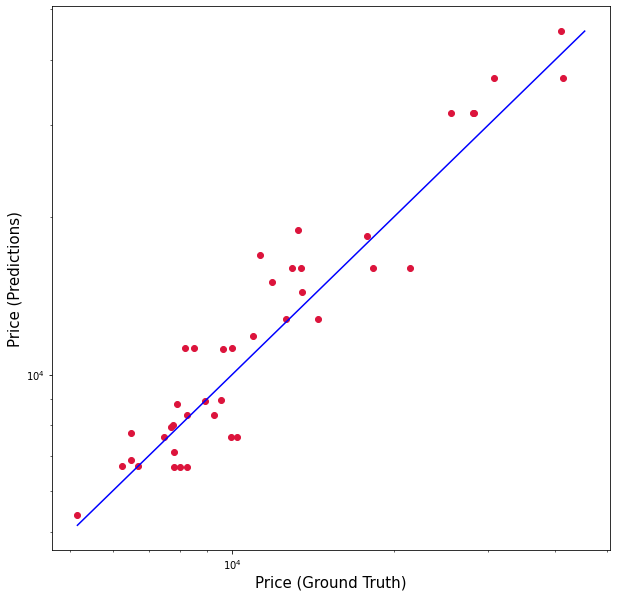

In [96]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, c='crimson')

plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred_new))
p2 = min(min(y_test), min(y_pred_new))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Price (Ground Truth)', fontsize=15)
plt.ylabel('Price (Predictions)', fontsize=15)
plt.show()

Dari percobaan menggunakan standardization, didapatkan R2 score dan RMSE yang sama. Artinya, model kita sudah cukup bagus.